## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

### Reference: 

Yenni, Glenda Marie, Peter Adler, and S. K. Morgan Ernest. 2012. Strong self-limitation promotes the persistence of rare species. Ecology. 93 (3) pp. 456 – 461. http://doi.org/10.1890/11-1087.1

### Code:

http://doi.org/10.1890/11-1087.1

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initialization and definition of variables, bounds, arrays, etc.

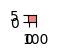

In [2]:
# Variables for the time series
tmax = 100
time = np.linspace(1,tmax,tmax)
y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
y1[0], y2[0] = 5, 5 #0.4, 0.6 # initial conditions
final_abundance1=np.zeros(0)
final_growth_rate1=np.zeros(0)
final_abundance2=np.zeros(0)
final_growth_rate2=np.zeros(0)
cov=np.zeros(0)

growth_rate1 = np.zeros(tmax)
growth_rate2 = np.zeros(tmax)
positive_growth_rate1=np.zeros(0)
positive_growth_rate2=np.zeros(0)
negative_growth_rate1=np.zeros(0)
negative_growth_rate2=np.zeros(0)
zero_growth_rate1=np.zeros(0)
zero_growth_rate2=np.zeros(0)
positive_final_abundance1=np.zeros(0)
positive_final_abundance2=np.zeros(0)
negative_final_abundance1=np.zeros(0)
negative_final_abundance2=np.zeros(0)
zero_final_abundance1=np.zeros(0)
zero_final_abundance2=np.zeros(0)

# Variables for the per capita growth rate
ymax = 50
y1_SR = np.zeros(ymax)
y2_SR = np.zeros(ymax)
growth_rate1_SR = np.zeros(ymax)
growth_rate2_SR = np.zeros(ymax)

# Dummy plot, not important
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
plt.rcParams.update({'font.size': 30})

## Covariance: strength of stabilization and final population

In [3]:
for r1 in range(15,20,1):
    for r2 in range(11,20,1):
        for a11 in np.arange(0.7,3,0.1):
            for a12 in np.arange(0.1,1,0.1):
                for a21 in np.arange(0.1,1,0.1):
                    for a22 in np.arange(0.1,1,0.1):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        for i in range(tmax-1):
                            growth_rate1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
                            growth_rate2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
                            y1[i+1] = y1[i] * growth_rate1[i]
                            y2[i+1] = y2[i] * growth_rate2[i]
                        S=np.array([S1,S2])
                        abundance=np.array([y1[-1],y2[-1]])
                        cov=np.append(cov,np.cov(abundance, S)[0][1])
                        final_abundance1=np.append(final_abundance1,y1[-1])
                        final_abundance2=np.append(final_abundance2,y2[-1])
                        final_growth_rate1=np.append(final_growth_rate1,growth_rate1[-2])
                        final_growth_rate2=np.append(final_growth_rate2,growth_rate2[-2])

### If the cov value is near zero, consider it zero:

In [4]:
for i in range(len(cov)):
    if np.absolute(cov[i])<1e-5:
        cov[i]=0.0

print("covariance: \n",cov)
cov.shape

covariance: 
 [173.33333333  46.28205128  14.76923077 ...  26.97215793  22.39531872
  18.66251308]


(754515,)

### If the growth rate value is near zero, consider it zero:

In [5]:
for i in range(len(final_growth_rate1)):
    if np.absolute(final_growth_rate1[i])<1e-5:
        final_growth_rate1[i]=0.0

np.log(final_growth_rate1)

array([-2.47135645e-13,  0.00000000e+00,  0.00000000e+00, ...,
       -2.39549587e-01, -1.11919815e-01, -1.03130204e-02])

### Divide the cov in 3 categories: cov > 0, cov < 0, cov = 0:

In [6]:
for i in range(len(cov)):
    if cov[i]>0:
        positive_growth_rate1=np.append(positive_growth_rate1,final_growth_rate1[i])
        positive_growth_rate2=np.append(positive_growth_rate2,final_growth_rate2[i])
        positive_final_abundance1=np.append(positive_final_abundance1,final_abundance1[i])
        positive_final_abundance2=np.append(positive_final_abundance2,final_abundance2[i])
    elif cov[i]<0:
        negative_growth_rate1=np.append(negative_growth_rate1,final_growth_rate1[i])
        negative_growth_rate2=np.append(negative_growth_rate2,final_growth_rate2[i])
        negative_final_abundance1=np.append(negative_final_abundance1,final_abundance1[i])
        negative_final_abundance2=np.append(negative_final_abundance2,final_abundance2[i])
    else:
        zero_growth_rate1=np.append(zero_growth_rate1,final_growth_rate1[i])
        zero_growth_rate2=np.append(zero_growth_rate2,final_growth_rate2[i])
        zero_final_abundance1=np.append(zero_final_abundance1,final_abundance1[i])
        zero_final_abundance2=np.append(zero_final_abundance2,final_abundance2[i])

## Reprodution of Fig. 1 from Yenni et al. (2012): frequency vs log (growth rate)

### Plotting all cov values together:

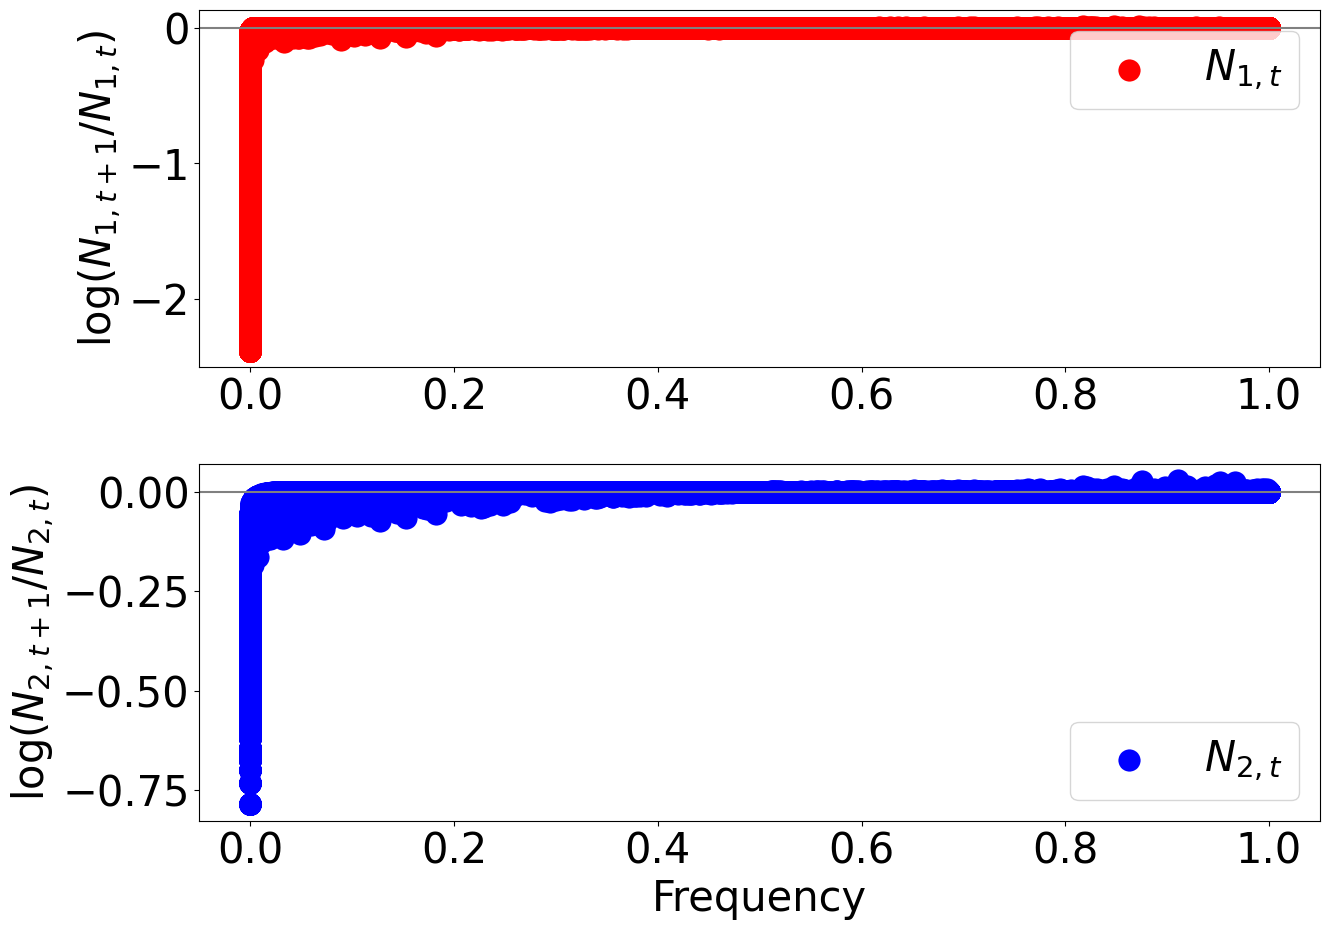

In [7]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(final_abundance1/(final_abundance1+final_abundance2), np.log(final_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(final_abundance2/(final_abundance1+final_abundance2), np.log(final_growth_rate2), linewidth=10, color="b", label='$N_{2,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

### Cov > 0

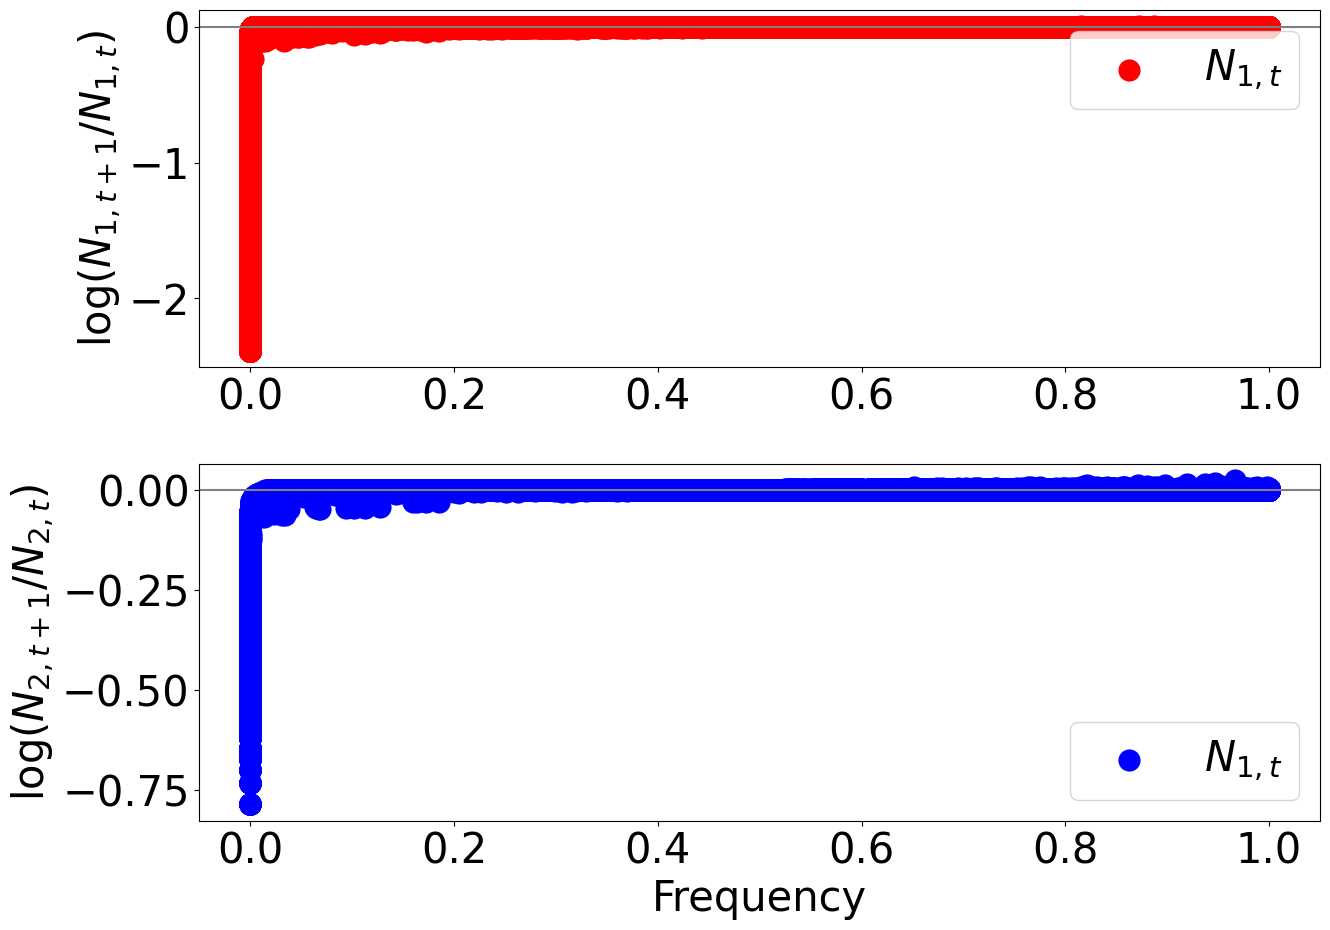

In [8]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(positive_final_abundance1/(positive_final_abundance1+positive_final_abundance2), np.log(positive_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(positive_final_abundance2/(positive_final_abundance1+positive_final_abundance2), np.log(positive_growth_rate2), linewidth=10, color="b", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

### Cov < 0

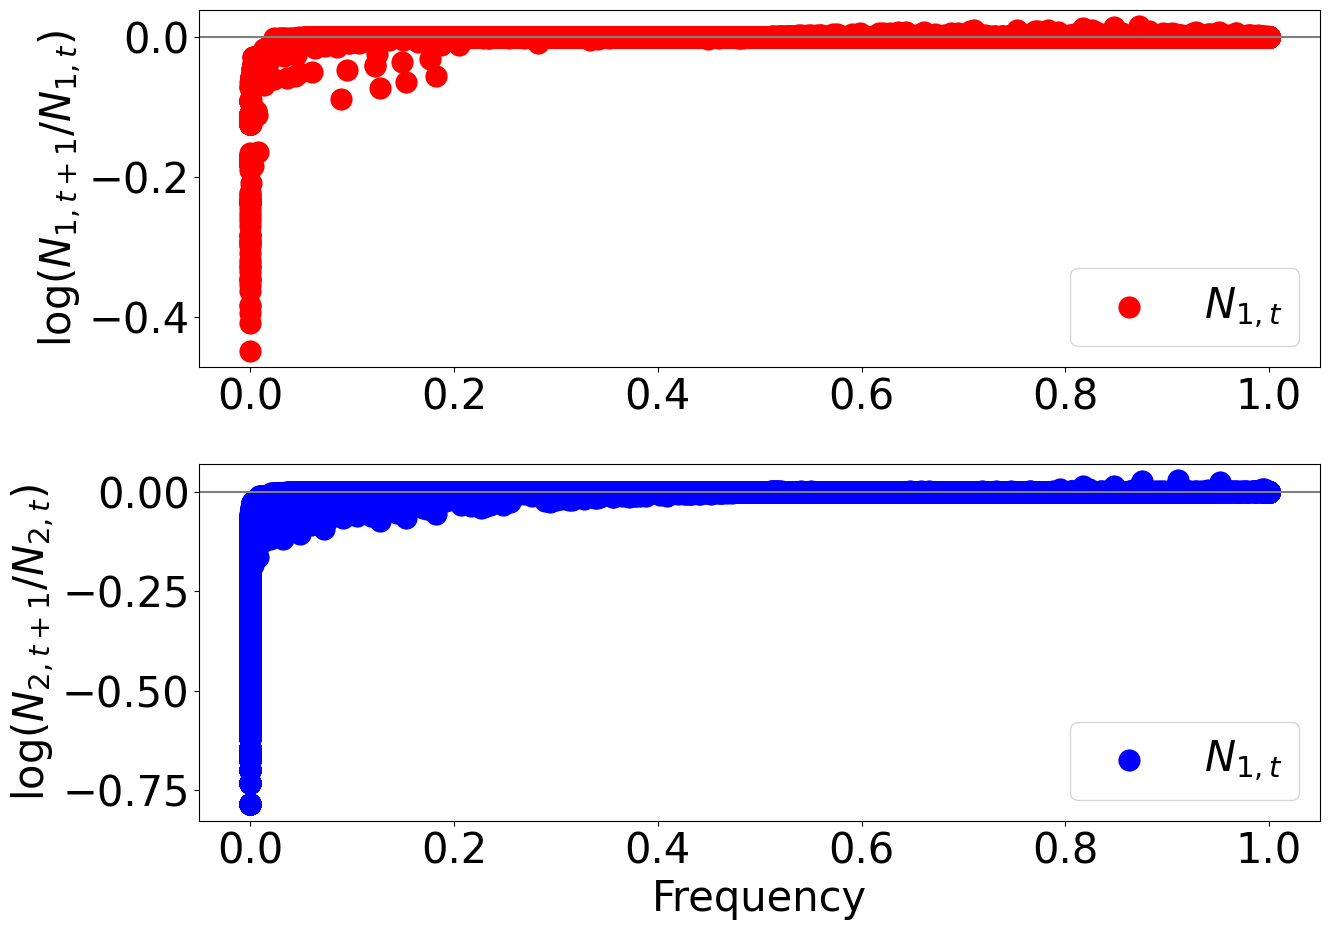

In [9]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(negative_final_abundance1/(negative_final_abundance1+negative_final_abundance2), np.log(negative_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(negative_final_abundance2/(negative_final_abundance1+negative_final_abundance2), np.log(negative_growth_rate2), linewidth=10, color="b", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

### Cov = 0

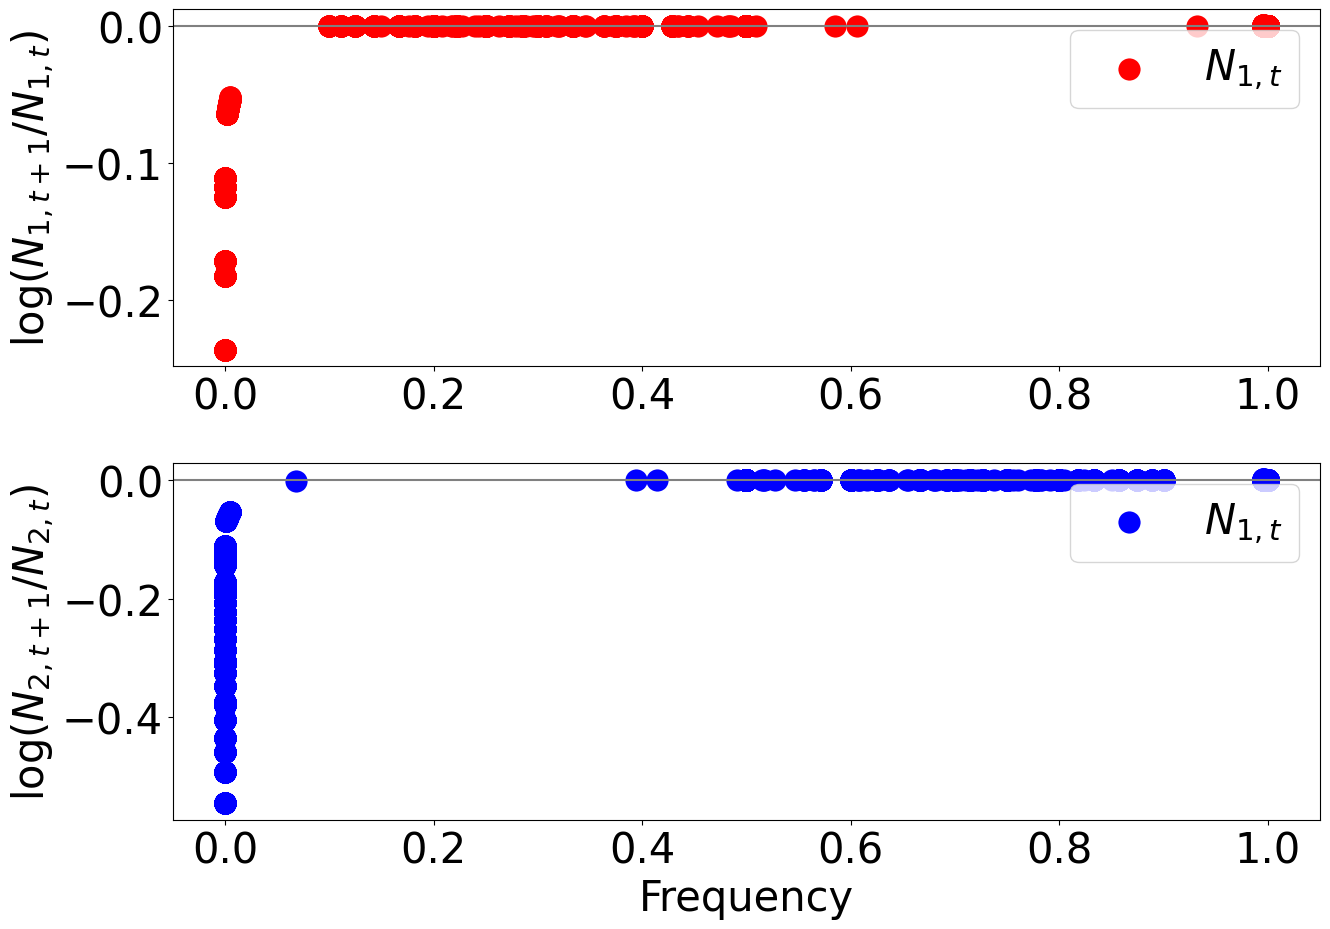

In [10]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(zero_final_abundance1/(zero_final_abundance1+zero_final_abundance2), np.log(zero_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(zero_final_abundance2/(zero_final_abundance1+zero_final_abundance2), np.log(zero_growth_rate2), linewidth=10, color="b", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

# Further analysis of model (1)

### A sample of parameters:

In [11]:
r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

### Redefine the competitive Beverton-Holt model to compute the increasing in N1 and N2:

In [12]:
for i in range(ymax):
    for j in range(ymax):
        growth_rate1_SR[i] = r1 / ( 1 + a11 * y1_SR[i] + a12 * y2_SR[j] )
        growth_rate2_SR[i] = r2 / ( 1 + a22 * y2_SR[j] + a21 * y1_SR[i] )
        y1_SR[i] = y1_SR[i] * growth_rate1_SR[i]
        y2_SR[j] = y2_SR[j] * growth_rate2_SR[j]

## Finite Growth Rate and Stock Recruitment Curve

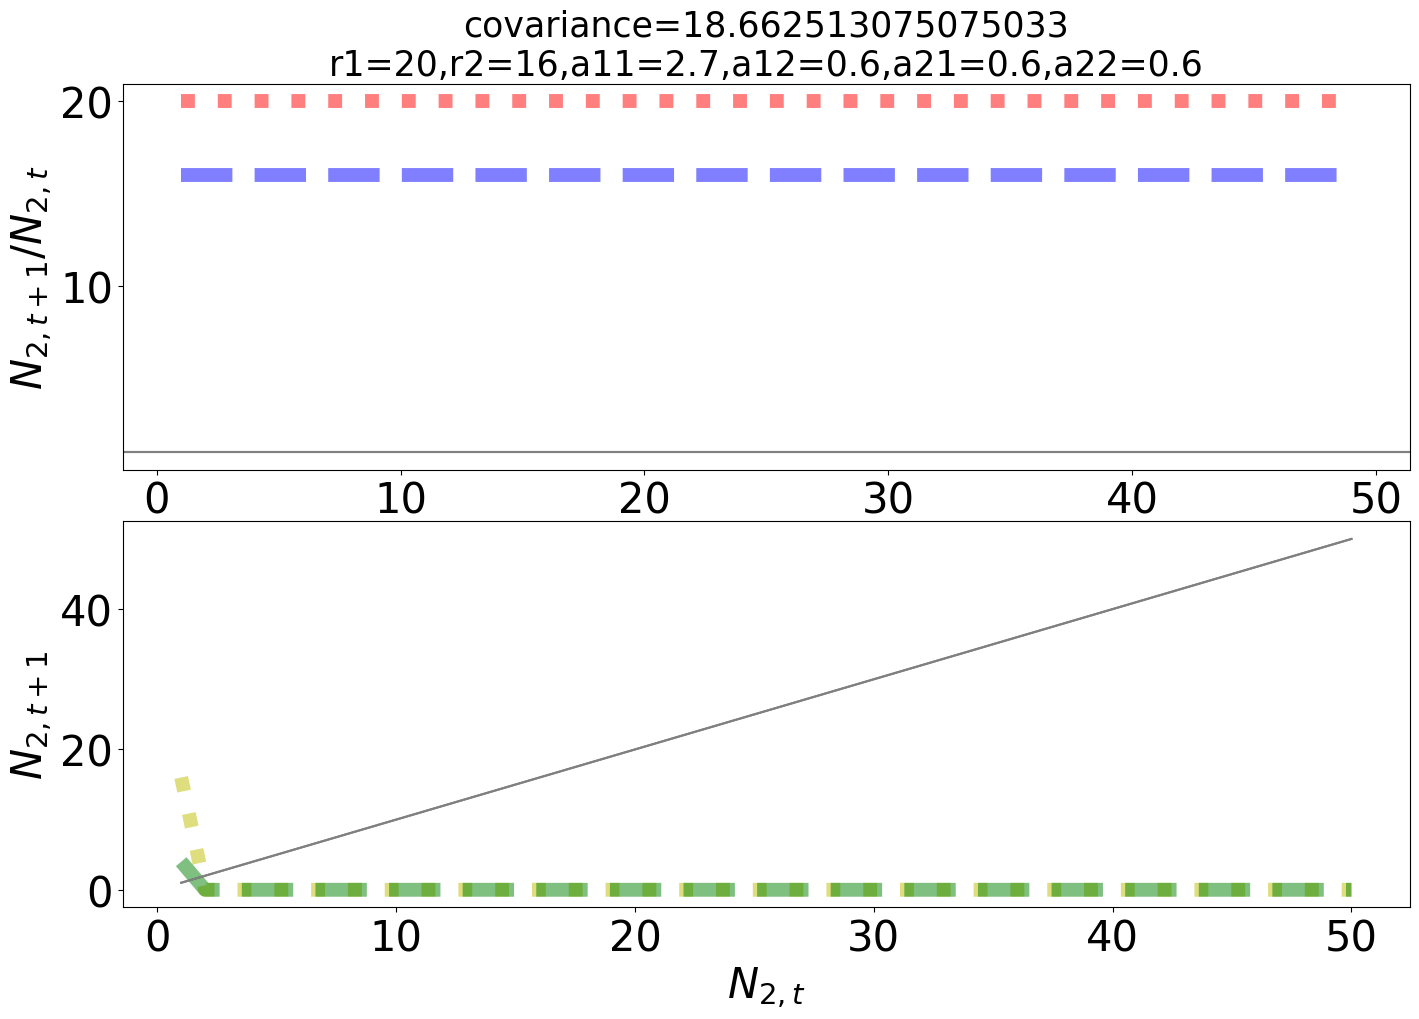

In [13]:
y1_SR[0], y2_SR[0] = 16, 4

N = np.linspace(1,ymax,ymax)
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
# Species 1
ax1.plot(N[0:-1], growth_rate1_SR[0:-1], alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax1.axhline(y=1, color='grey', linestyle='-')
ax1.set(ylabel='$N_{1,t+1}/N_{1,t}$')
# Species 2
ax1.plot(N[0:-1], growth_rate2_SR[0:-1], alpha=0.5,linestyle="dashed", linewidth=10, markersize=12, color="b")
ax1.axhline(y=1, color='grey', linestyle='-')
ax1.set(ylabel='$N_{2,t+1}/N_{2,t}$')
# Stock-Recruitment
# Species 1
ax2.plot(N, y1_SR, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="y")
ax2.plot(N,N, color="grey") # add a straight line
#ax2.set_ylim([-1, 5])
ax2.set(xlabel='$N_{1,t}$', ylabel='$N_{1,t+1}$')
# Species 2
ax2.plot(N, y2_SR, alpha=0.5,linestyle="dashed", linewidth=10, markersize=12, color="g")
ax2.plot(N,N, color="grey") # add a straight line
#ax2.set_ylim([-1, 5])
ax2.set(xlabel='$N_{2,t}$', ylabel='$N_{2,t+1}$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/finite_growth_rate_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

# Test graph

In [14]:
TP = final_abundance1 + final_abundance2
relative_abundance1 = final_abundance1 / TP
relative_abundance2 = final_abundance2 / TP

[Text(0, 0.5, '$N_{2,t+1}/N_{2,t}$')]

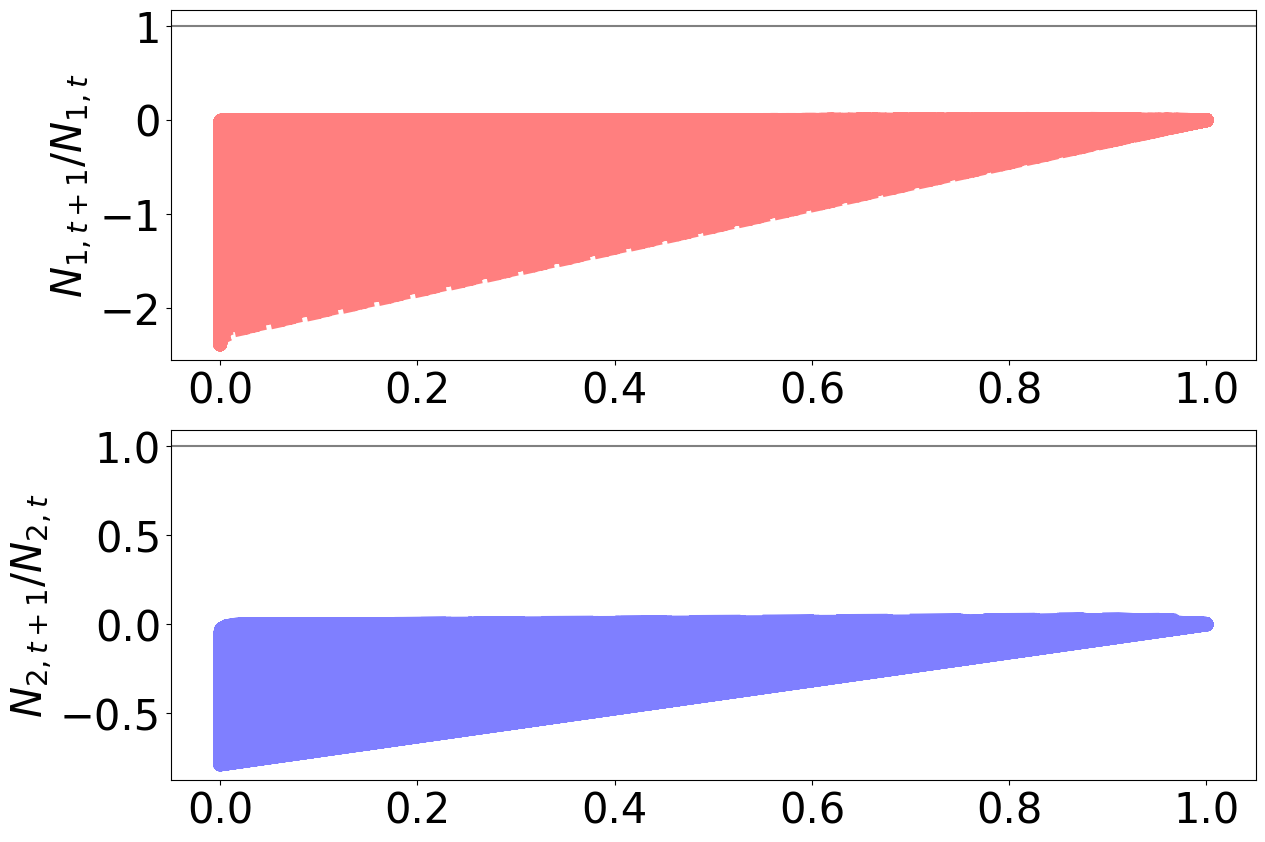

In [15]:
N = np.linspace(1,ymax,ymax)
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
# Species 1
ax1.plot(relative_abundance1, np.log(final_growth_rate1), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax1.axhline(y=1, color='grey', linestyle='-')
ax1.set(ylabel='$N_{1,t+1}/N_{1,t}$')
# Species 2
ax2.plot(relative_abundance2, np.log(final_growth_rate2), alpha=0.5,linestyle="dashed", linewidth=10, markersize=12, color="b")
ax2.axhline(y=1, color='grey', linestyle='-')
ax2.set(ylabel='$N_{2,t+1}/N_{2,t}$')